In [1]:
import numpy as np
import matplotlib.pyplot as plt

import hist_contour as hc

plt.rcParams.update({"font.size": 15})

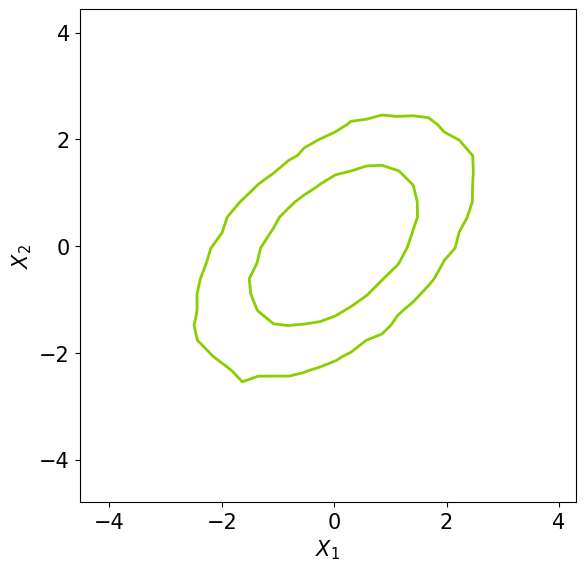

In [2]:
# plot some draws from a multivariate normal
X = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 100000)

hc.hist_contour(X[:,0], X[:,1], xlabel="$X_1$", ylabel="$X_2$", colour="#8ACE00")
plt.show()

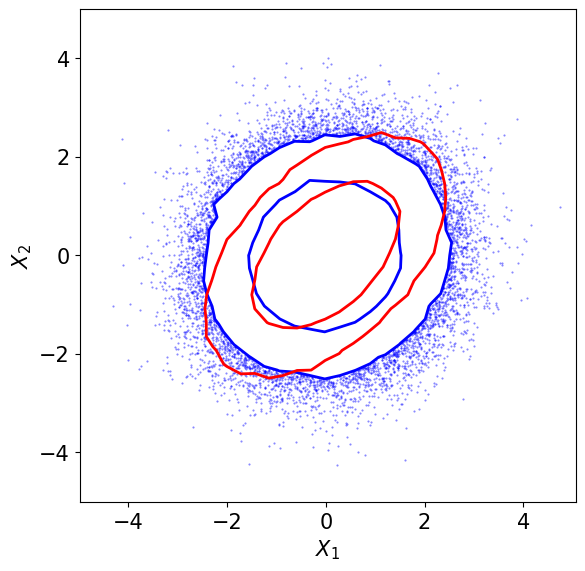

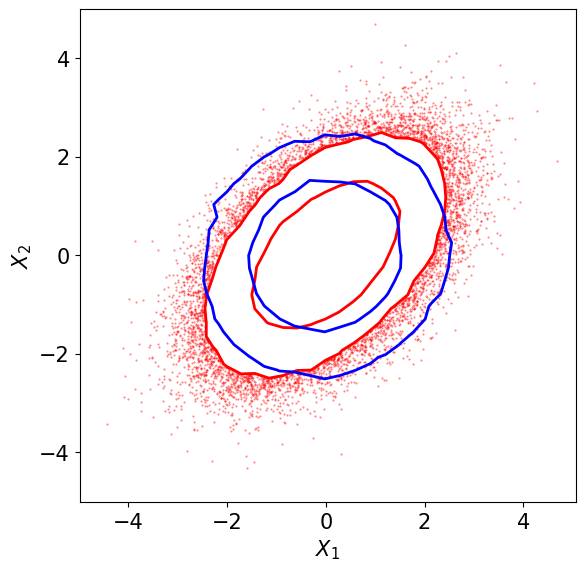

In [3]:
# a more complicated double layered example, with outliers
X1 = np.random.multivariate_normal([0, 0], [[1, 0.1], [0.1, 1]], 100000)
X2 = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 100000)

# we'll plot the outliers for X1, and just the contours for X2
ax = hc.hist_contour(X1[:,0], X1[:,1], xlabel="$X_1$", ylabel="$X_2$", show_outliers=True, colour="blue")
hc.hist_contour(X2[:,0], X2[:,1], xlabel="$X_1$", ylabel="$X_2$", ax=ax, colour="red")
# adjust the axis limits based on the extent of the contours
hc.centre_axis_on_contours(ax, 0.5)
plt.show()

# now we can try the other way around
ax = hc.hist_contour(X2[:,0], X2[:,1], xlabel="$X_1$", ylabel="$X_2$", show_outliers=True, colour="red")
hc.hist_contour(X1[:,0], X1[:,1], xlabel="$X_1$", ylabel="$X_2$", ax=ax, colour="blue")
# adjust the axis limits based on the extent of the contours
hc.centre_axis_on_contours(ax, 0.5)
plt.show()

/Users/stephenthorp/Documents/hist_contour/hist_contour.py:291: UserWarning: linewidths is ignored by contourf
  ax.contourf(x_grid, y_grid, z, levels=l, colors=fill_colours,


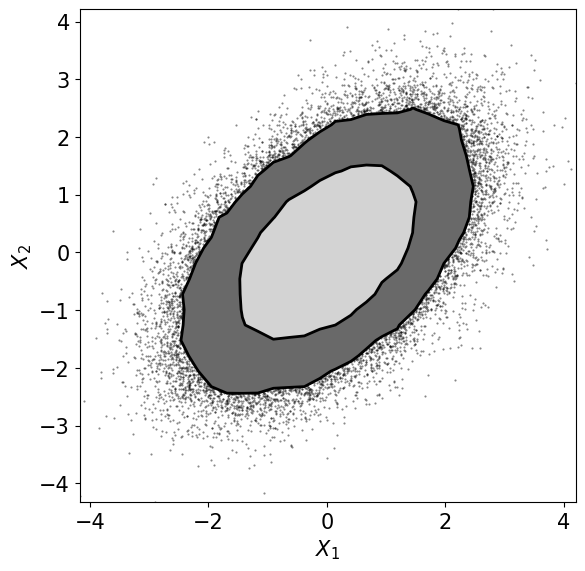

In [4]:
# another example with contour levels shaded based on a list of colours or colourmap
# list of colours, with outliers shown
X = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 100000)

hc.hist_contour(X[:,0], X[:,1], xlabel="$X_1$", ylabel="$X_2$", shading=["dimgray", "lightgray"], show_outliers=True)
plt.show()

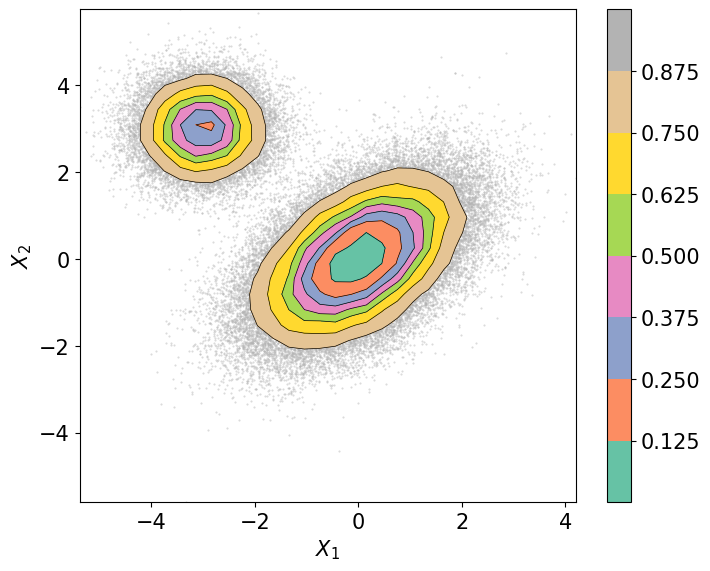

In [5]:
# two islands of density
# 8 levels with a discrete colour map
X = np.zeros((100000,2))
X[:75000] = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 75000)
X[75000:] = np.random.multivariate_normal([-3, 3], [[0.4, 0.0], [0.0, 0.4]], 25000)

ax = hc.hist_contour(X[:,0], X[:,1], xlabel="$X_1$", ylabel="$X_2$", levels=np.linspace(0.875, 0.125, 7), shading="Set2", show_outliers=True, figsize=(8, 6.4), linewidth=0.5)
plt.show()

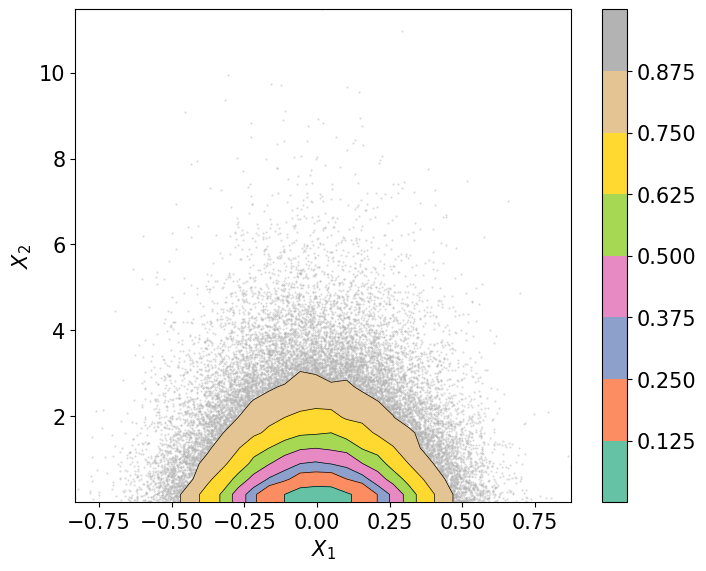

In [6]:
# hard lower boundaries using the refelection method
# 8 levels with a discrete colour map
X = np.zeros((100000,2))
X[:,1] = np.random.exponential(1, 100000)
X[:,0] = np.random.normal(0, 0.2, 100000)

ax = hc.hist_contour(X[:,0], X[:,1], xlabel="$X_1$", ylabel="$X_2$", levels=np.linspace(0.875, 0.125, 7), shading="Set2", show_outliers=True, figsize=(8, 6.4), linewidth=0.5, y_bounds=("hard", "soft"))
plt.show()

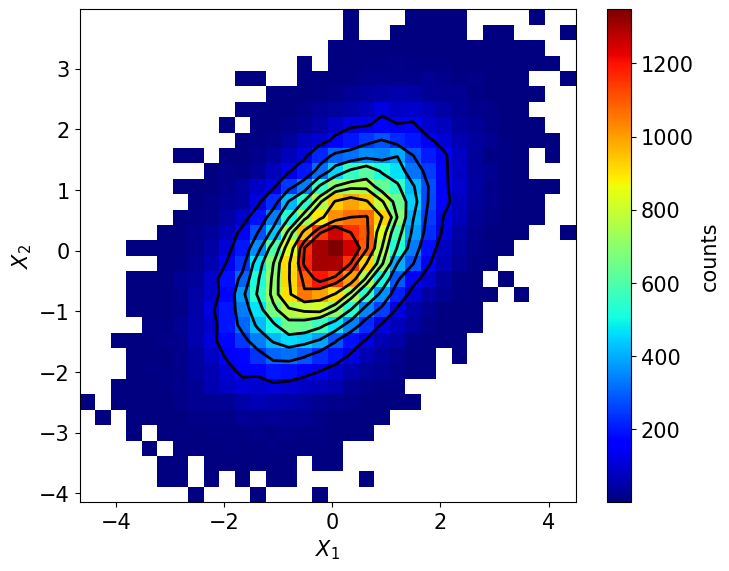

In [7]:
# showing the underlying histogram with levels every 10%
# in the style of e.g. Bond et al. (2010; https://ui.adsabs.harvard.edu/abs/2010ApJ...716....1B/abstract)
X = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 100000)

ax = hc.hist_contour(X[:,0], X[:,1], xlabel="$X_1$", ylabel="$X_2$", clabel="counts", levels=[0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1], show_histogram=True, figsize=(8, 6.4))
plt.show()

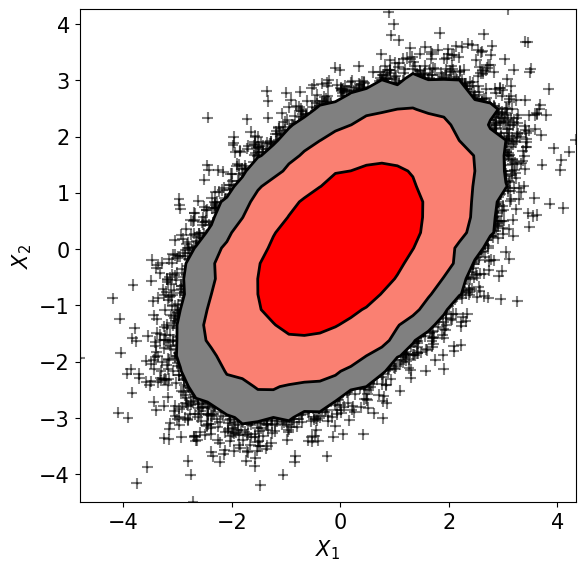

In [8]:
# example with a small amount of noise added
# focusing on the most extreme outliers in the plot
# list of colours, with outliers shown
noise = 0.1
X = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 100000) + np.random.normal(0, noise, (100000,2))

hc.hist_contour(X[:,0], X[:,1], x_errs=noise, y_errs=noise, xlabel="$X_1$", ylabel="$X_2$", shading=["grey", "salmon", "red"], levels=[0.99, 0.95, 0.68], show_outliers=True)
plt.show()